# 🏥 Stark Health Clinic – Diabetes Prediction Project

## 📌 Project Overview

This project was undertaken in collaboration with Stark Health Clinic to develop a machine learning model capable of predicting the likelihood of diabetes onset in patients. By leveraging routinely collected clinical data, the model aims to enable early diagnosis and proactive healthcare interventions, thereby improving outcomes and reducing long-term treatment costs.

---

## 🎯 Problem Definition

Diabetes presents significant challenges to Stark Health Clinic—both in terms of patient well-being and financial cost. Existing early detection mechanisms often fail to identify patients at risk in a timely manner, leading to avoidable complications.

The project’s goal is to build a robust and interpretable machine learning model that uses available patient data to:

- Predict whether a patient is likely to develop diabetes.
- Enable targeted screening and early intervention.
- Reduce the long-term healthcare burden through preventive care.

---

## 🧰 Tools and Technologies Used

- **Language**: Python  
- **Libraries**: Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn  
- **Platform**: Jupyter Notebook via Anaconda Distribution

---

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,classification_report , RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint 
import shap
import pickle

pd.set_option('display.max_columns', 500)
sns.set()

sns.set_style('darkgrid')




## Data Loading

In [3]:
#Loading the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Dictionary: Diabetes Prediction Dataset

| Variable               | Description                          | Type       | Categories/Range                     | Clinical Notes                                                                 | Dataset Statistics                                                                 |
|------------------------|--------------------------------------|------------|--------------------------------------|--------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| **gender**            | Biological sex                       | Categorical| `Female`, `Male`, `Other`            | -                                                                              | **Count**: 96,146<br>**Top**: Female (56,161, 58.4%)                              |
| **age**               | Age (years)                          | Numerical  | `[0.08, 80.0]`                       | Pediatric (<18), Adult (18-65), Senior (>65)                                   | **Mean**: 41.8 ± 22.5<br>**Median**: 43.0 (IQR: 24-59)                            |
| **hypertension**      | Hypertension diagnosis               | Binary     | `0` (No: 92.2%), `1` (Yes: 7.8%)     | Major diabetes risk factor.                                                   | **Mean**: 0.078 ± 0.268                                                           |
| **heart_disease**     | Heart disease diagnosis             | Binary     | `0` (No: 95.9%), `1` (Yes: 4.1%)     | Comorbidity with diabetes.                                                    | **Mean**: 0.041 ± 0.198                                                           |
| **smoking_history**   | Smoking status                      | Categorical| `never` (34,398, 35.8%),<br>`No Info`, `current`, `former`, `ever`, `not current` | "No Info" implies missing data. "Current" smokers at higher risk.              | **Unique**: 6                                                                     |
| **bmi**              | Body Mass Index                     | Numerical  | `[10.01, 95.69]`                     | **WHO Categories**:<br>- Underweight (<18.5)<br>- Obese (≥30)                 | **Mean**: 27.3 ± 6.8<br>**Median**: 27.3 (IQR: 23.4-29.9)                         |
| **HbA1c_level**      | 3-month avg blood sugar (%)         | Numerical  | `[3.5, 9.0]`                         | **Thresholds**:<br>- Normal: <5.7<br>- Prediabetes: 5.7-6.4<br>- Diabetes: ≥6.5 | **Mean**: 5.53 ± 1.07<br>**Median**: 5.8 (IQR: 4.8-6.2)                           |
| **blood_glucose_level** | Fasting glucose (mg/dL)            | Numerical  | `[80, 300]`                          | **Thresholds**:<br>- Normal: <100<br>- Prediabetes: 100-125<br>- Diabetes: ≥126 | **Mean**: 138.2 ± 40.9<br>**Median**: 140 (IQR: 100-159)                          |
| **diabetes**         | Diabetes diagnosis (Target)         | Binary     | `0` (No: 91.2%), `1` (Yes: 8.8%)     | Imbalanced class (8.8% prevalence).                                           | **Mean**: 0.088 ± 0.284                                                           |

---

### Key Insights from Data Summary:
1. **Class Imbalance**:  
   - Only **8.8%** of patients have diabetes (`diabetes=1`). Consider stratification or resampling.
2. **Missing Data**:  
   - `smoking_history` has a category `"No Info"` (exact count not shown). Treat as missing.
3. **Clinical Outliers**:  
   - **BMI**: Max = 95.69 (likely error; consider capping at 50).  
   - **HbA1c**: 9.0% indicates poorly controlled diabetes.  
4. **Age Distribution**:  
   - Wide range (0.08 to 80 years). Pediatric cases may need separate analysis.

---



### References:
- **HbA1c Guidelines**: American Diabetes Association (ADA).  
- **BMI Categories**: World Health Organization (WHO).

# 🧹 Step 2: Data Cleaning and Preprocessing

### 🔍 Initial Data Inspection

Initial exploration was done using `.info()` and `.describe()` to check column data types, detect potential anomalies, and understand distribution characteristics. This revealed:

- No missing values in any columns.
- Several categorical features (`gender`, `smoking_history`) and numerical features (`age`, `bmi`, `HbA1c_level`, `blood_glucose_level`).
- Potential duplicates.

###  Duplicate Removal

A total of **3,854 duplicate records** were identified and removed from the dataset. This left **92,292 unique patient records**, ensuring the model is trained on clean, unbiased data.

---

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
#Remove Duplicate Rows
duplicates_removed = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Removed {duplicates_removed} duplicate rows.")

Removed 3854 duplicate rows.


In [17]:
df.reset_index(inplace=True, drop=True)


# 🔍 Step 3: Exploratory Data Analysis (EDA)



In [20]:
print('This data set contains', df.shape[0], 'and', df.shape[1], 'columns')

This data set contains 96146 and 9 columns


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
for i in df:
    if df[i].dtype == 'O':
        print(f'{i} has {df[i].nunique()} categories\nThey are: \n{df[i].unique()}\n')

gender has 3 categories
They are: 
['Female' 'Male' 'Other']

smoking_history has 6 categories
They are: 
['never' 'No Info' 'current' 'former' 'ever' 'not current']



##  3.1 Univariate Analysis

### 📊 Categorical Variables

To understand the distribution and balance of the categorical features, count plots were generated for the following variables:

- `gender`
- `smoking_history`
- `hypertension`
- `heart_disease`
- `diabetes`

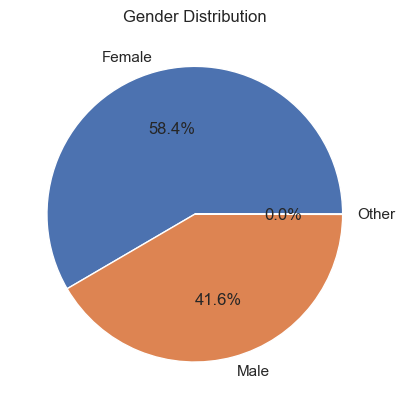

In [20]:

# Plot distribution of Gender label
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
#plt.savefig("gender.jpg")
plt.show()

In [22]:
categorical_cols = ['gender','smoking_history','hypertension','heart_disease','diabetes']

In [25]:
continous_numerical_cols = ['age','bmi','HbA1c_level','blood_glucose_level']

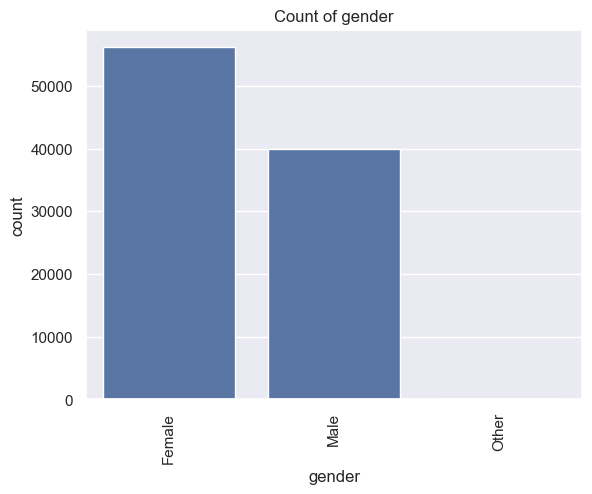

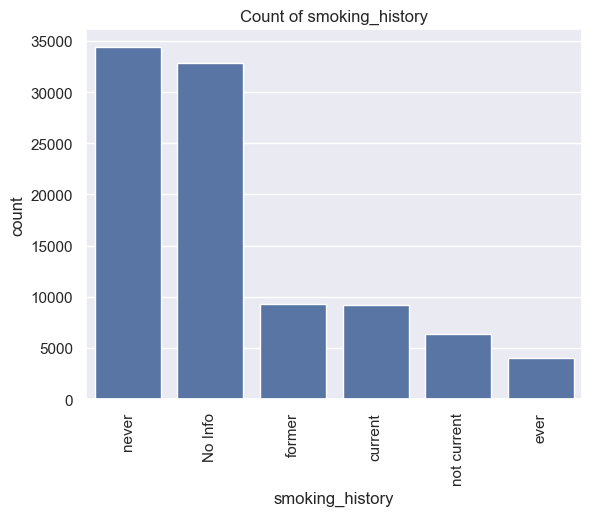

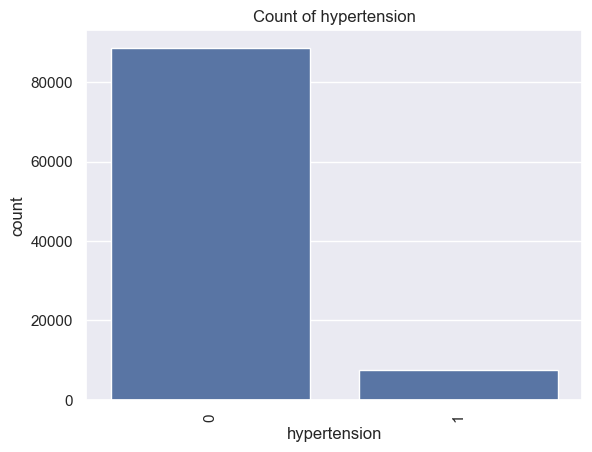

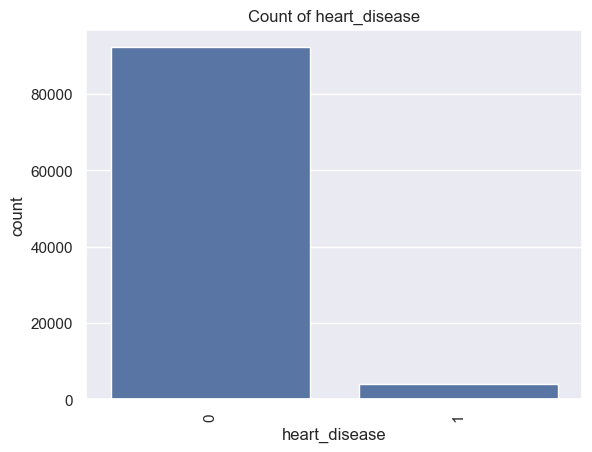

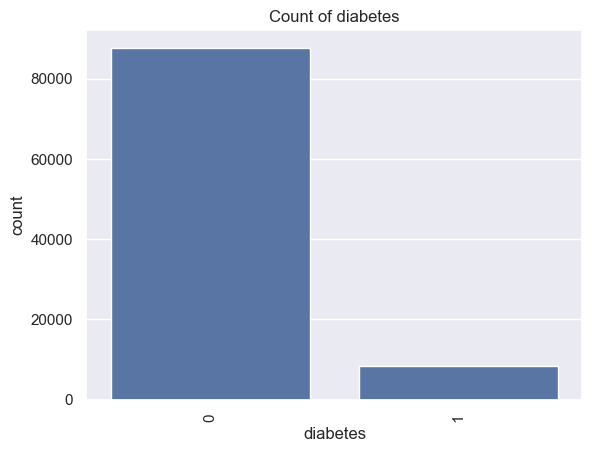

In [ ]:
for cat_column  in categorical_cols:

  def plot(cat_column):

      # Plot the counts each variable in a category
      sns.countplot(x=cat_column, data=df,order = df[cat_column].value_counts().sort_values(ascending=False).index)

      plt.title('Count of '+ cat_column)
      plt.xticks(rotation=90)
      plt.show()

  plot(cat_column)

#### 🔎 Summary:

- **Gender**:  
  - Female: 56,161  
  - Male: 39,967  
  - Other: 18  

  **Insight**: The dataset is skewed towards female patients, accounting for over 58% of the population. The "Other" category is very minimal, indicating possible data noise or rare gender classifications.

- **Smoking History**:  
  - Never: 34,398  
  - No Info: 32,887  
  - Former: 9,299  
  - Current: 9,197  
  - Not Current: 6,367  
  - Ever: 3,998  

  **Insight**: A large proportion of the dataset either never smoked or has missing smoking information. The presence of multiple smoking status categories offers an opportunity to explore how each type correlates with diabetes risk.

- **Hypertension**:  
  - 0 (No): 88,685  
  - 1 (Yes): 7,461  

  **Insight**: Most patients do not have hypertension (~92%). This imbalance suggests that any relationship between hypertension and diabetes will need to be evaluated carefully to avoid misleading conclusions due to class imbalance.

- **Heart Disease**:  
  - 0 (No): 92,223  
  - 1 (Yes): 3,923  

  **Insight**: The vast majority of patients (96%) do not have heart disease. However, even this small fraction could show a significant association with diabetes, as heart-related issues are known comorbidities.

- **Diabetes (Target Variable)**:  
  - 0 (No): 87,664  
  - 1 (Yes): 8,482  

  **Insight**: Only about 8.8% of patients are diabetic, highlighting a class imbalance problem that must be addressed during model evaluation to avoid bias toward the non-diabetic class.

---



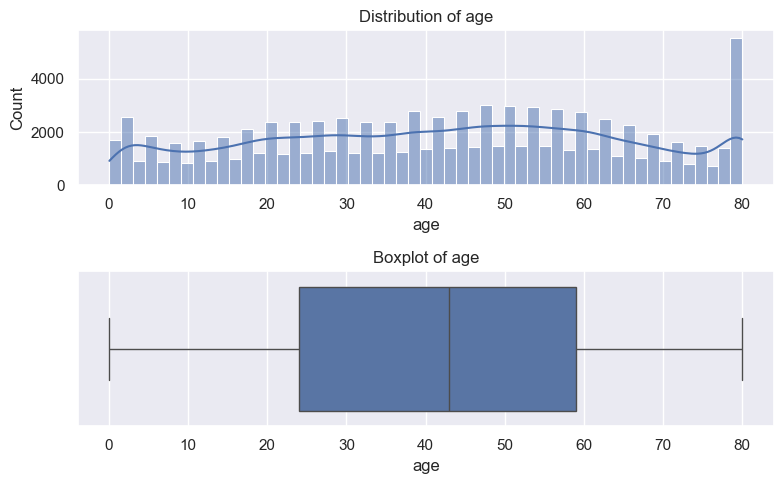

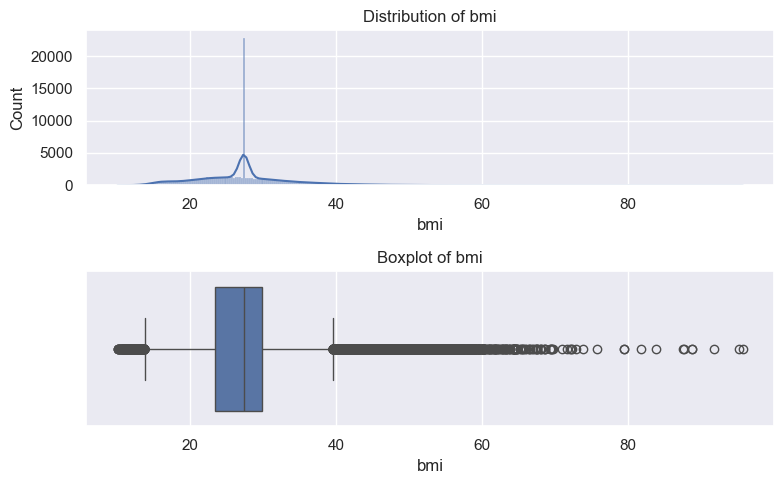

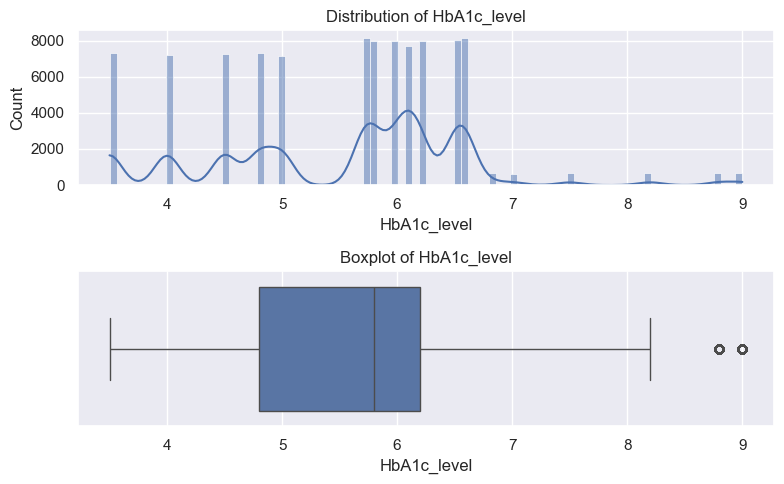

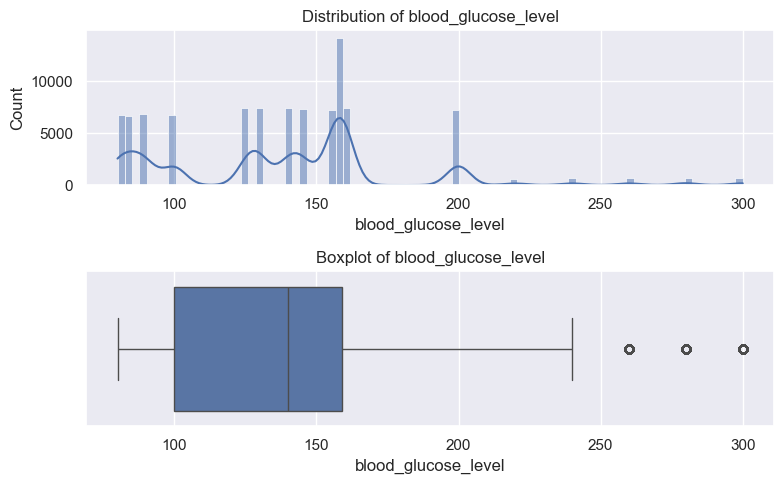

In [ ]:
for num_column in continous_numerical_cols:

  def plot(num_column):
      fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

      # Plot the distribution with the bell curve line
      sns.histplot(df[num_column], kde=True ,ax=ax1)
      ax1.set_title('Distribution of '+ num_column)

      # Plot the boxplot
      sns.boxplot(df[num_column], orient='h', ax=ax2)
      ax2.set_title('Boxplot of '+ num_column)

      plt.tight_layout()
      plt.show()

  plot(num_column)

#### 🔎 Summary:

- **Age**:  
  - Mean: 41.79  
  - Median: 43.00  
  - Min: 0.08  
  - Max: 80.00  

  **Insight**: The age distribution is fairly spread out with a slight right skew. There are outliers on the younger end (e.g., infants or toddlers), which could suggest a mix of pediatric and adult patients in the dataset.

- **BMI**:  
  - Mean: 27.32  
  - Range: 10.01 to 95.69  

  **Insight**: The BMI values span a wide range. While the average falls within the overweight category (25–29.9), some extreme values (BMI > 60) may be outliers or data quality issues.

- **HbA1c Level**:  
  - Mean: 5.53  
  - Standard Deviation: 1.07  

  **Insight**: Most HbA1c values fall within normal or prediabetic ranges (4.0–6.4). This feature is likely to be a strong predictor given its clinical relevance in diagnosing diabetes.

- **Blood Glucose Level**:  
  - Mean: 138.22 mg/dL  
  - Standard Deviation: 40.91  

  **Insight**: Blood glucose levels are skewed right, with a few patients having very high levels (up to 300 mg/dL), potentially indicating uncontrolled diabetes or measurement spikes.

---

##  3.2 Bivariate Analysis

###  Numerical vs. Diabetes Outcome

A pairplot was used to visualize how continuous features such as `age`, `bmi`, `HbA1c_level`, and `blood_glucose_level` interact with the target variable `diabetes`.

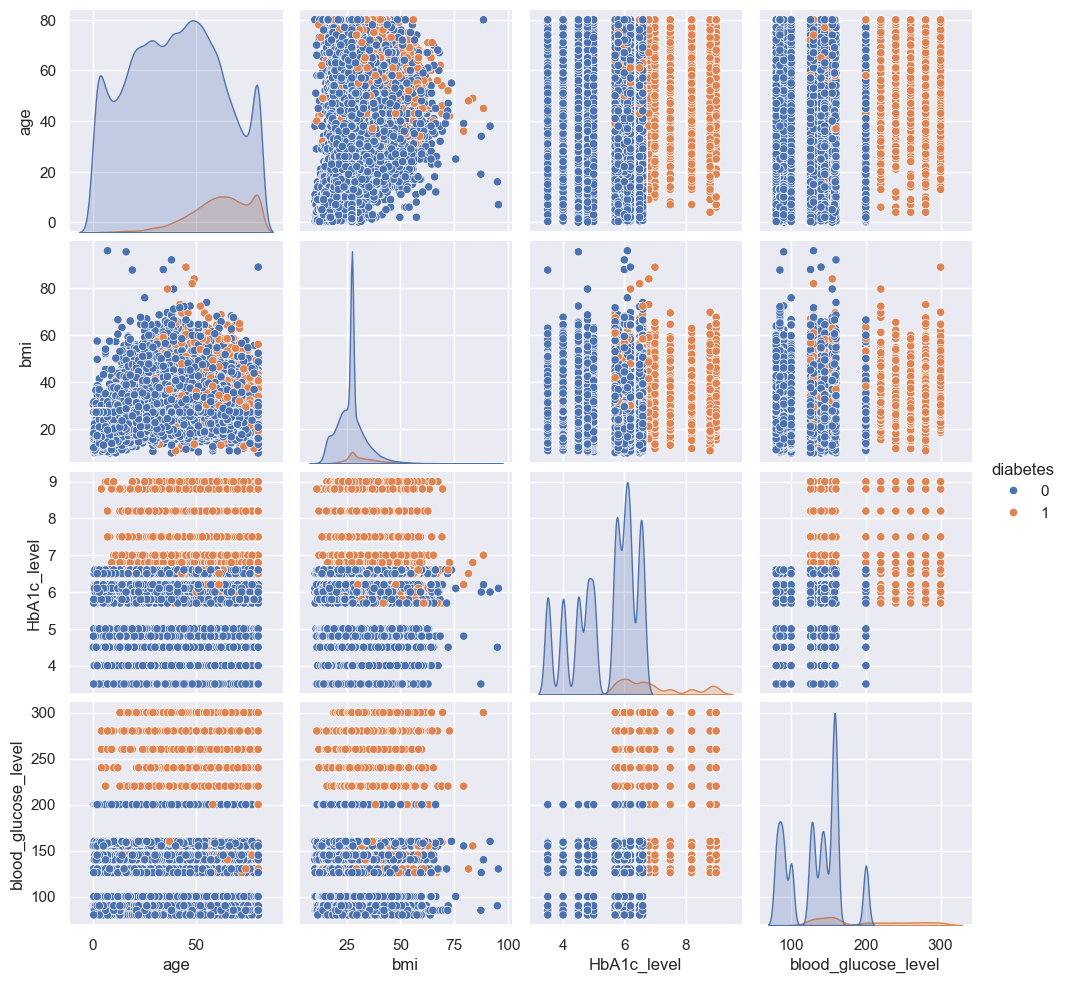

In [28]:
sns.pairplot(data=df, hue='diabetes', vars=continous_numerical_cols)
plt.show()

###  Categorical vs. Diabetes Outcome

Count plots with `hue="diabetes"` helped visualize the relationship between diabetes status and categorical features.



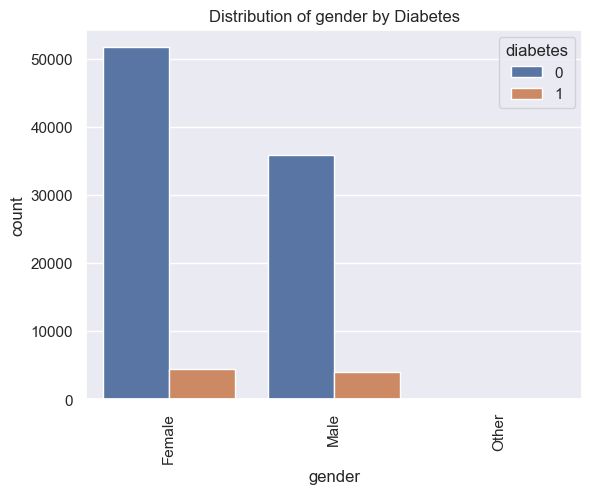

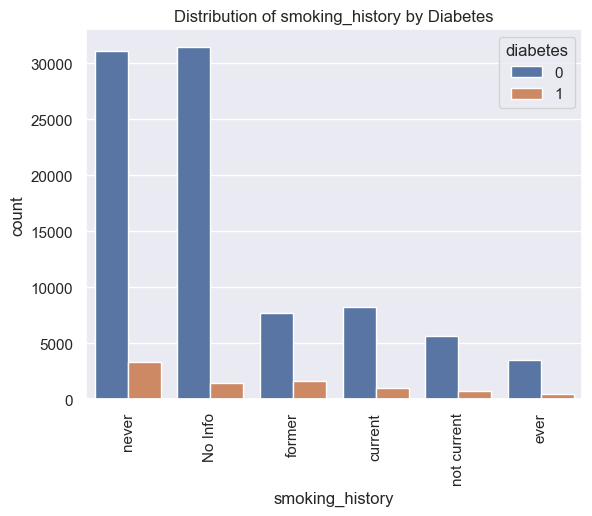

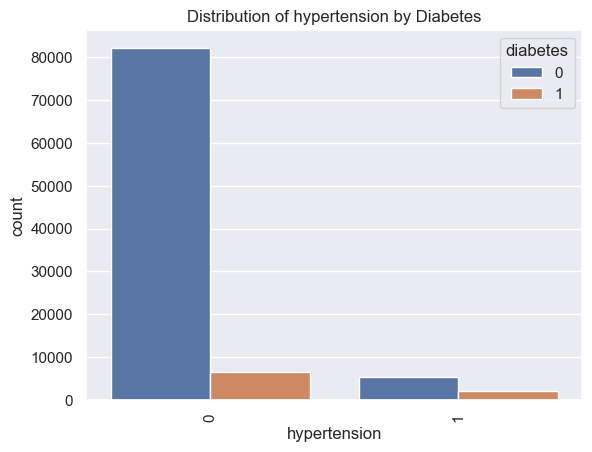

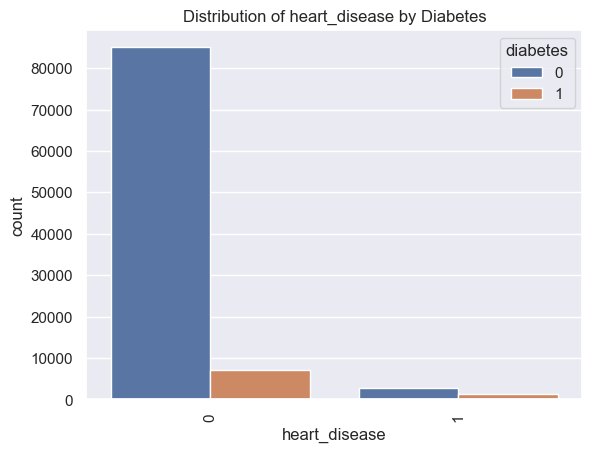

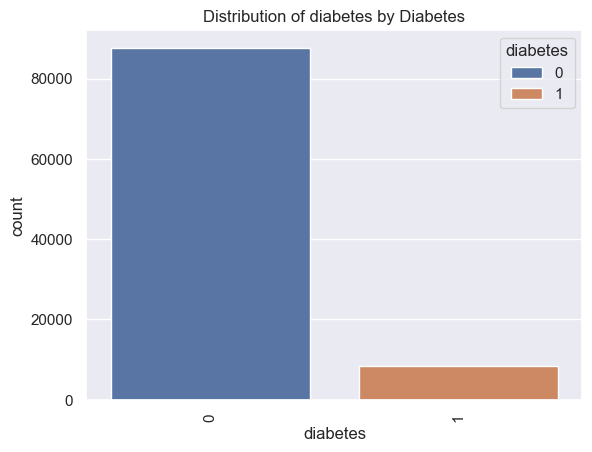

In [29]:
for cat_column  in categorical_cols:

  def plot(cat_column):

      # Plot the counts each variable in a category
      sns.countplot(x=cat_column, hue='diabetes', data=df,order = df[cat_column].value_counts().sort_values(ascending=False).index)

      plt.title('Distribution of '+ cat_column + ' by Diabetes')
      plt.xticks(rotation=90)
      plt.show()

  plot(cat_column)

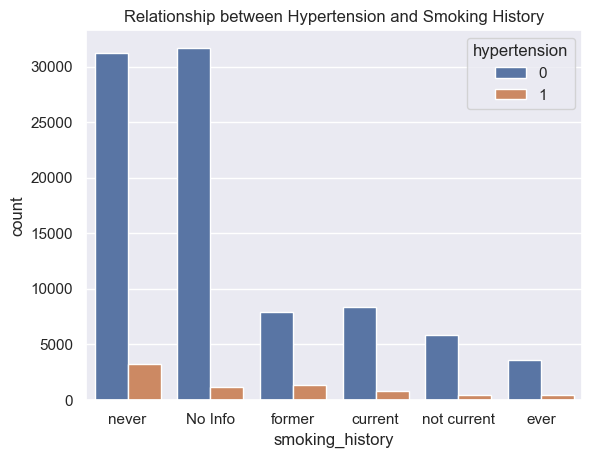

In [35]:
sns.countplot(x='smoking_history', hue= 'hypertension' , data=df,order = df['smoking_history'].value_counts().sort_values(ascending=False).index)

plt.title('Relationship between Hypertension and Smoking History')
plt.show()

#### 🔎 Insights:

- Patients with **hypertension** and **heart disease** show a higher prevalence of diabetes.
- Certain smoking groups, such as **"current"** and **"ever"** smokers, are more likely to have diabetes.
- Gender appears to have a moderate influence on diabetes outcome.

---

#  Step 4: Feature Engineering

Feature engineering involved both statistical testing for feature relevance and transformations to prepare the data for machine learning algorithms.

---

##  4.1 Feature Selection

###  Chi-Square Test for Categorical Variables

A **Chi-Square test of independence** was conducted between the target variable (`diabetes`) and all categorical features to determine if statistically significant associations exist. The categorical features tested were:

- `gender`
- `smoking_history`
- `hypertension`
- `heart_disease`

Chi-Square Test for diabetes and gender:
Chi2: 139.3851343057988, p-value: 5.4063313009771595e-31



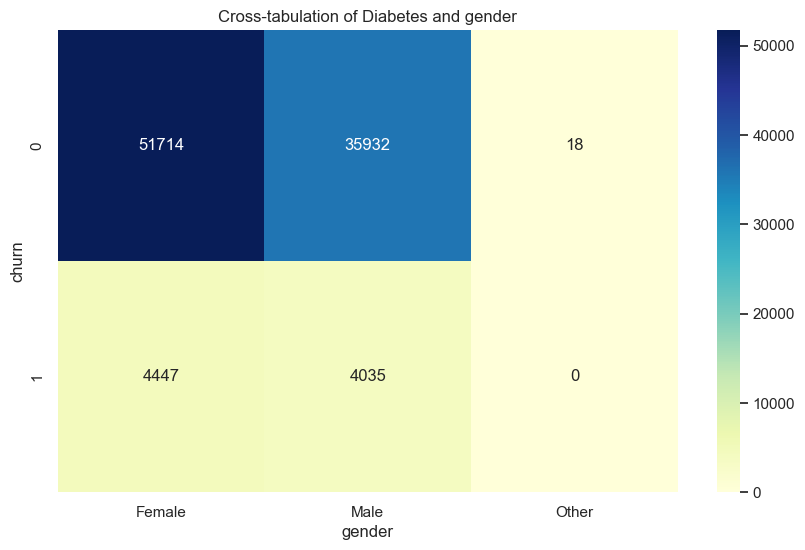

Chi-Square Test for diabetes and smoking_history:
Chi2: 1728.318606625952, p-value: 0.0



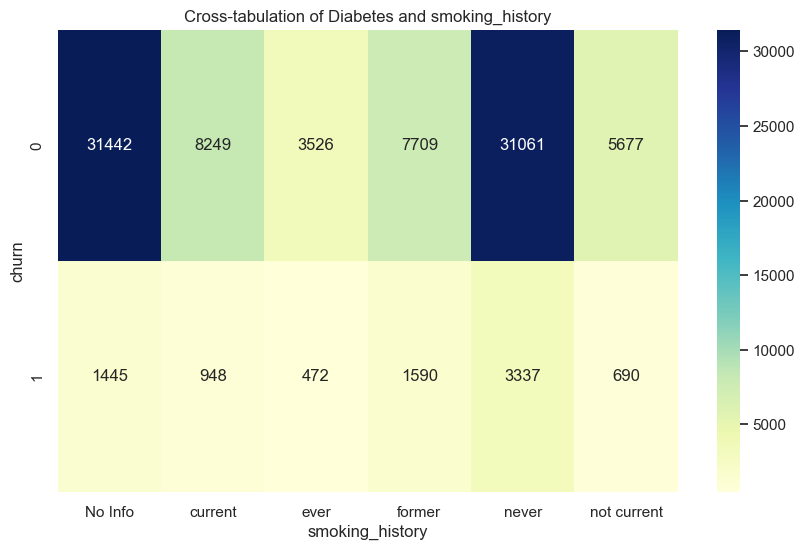

Chi-Square Test for diabetes and hypertension:
Chi2: 3680.0329357951405, p-value: 0.0



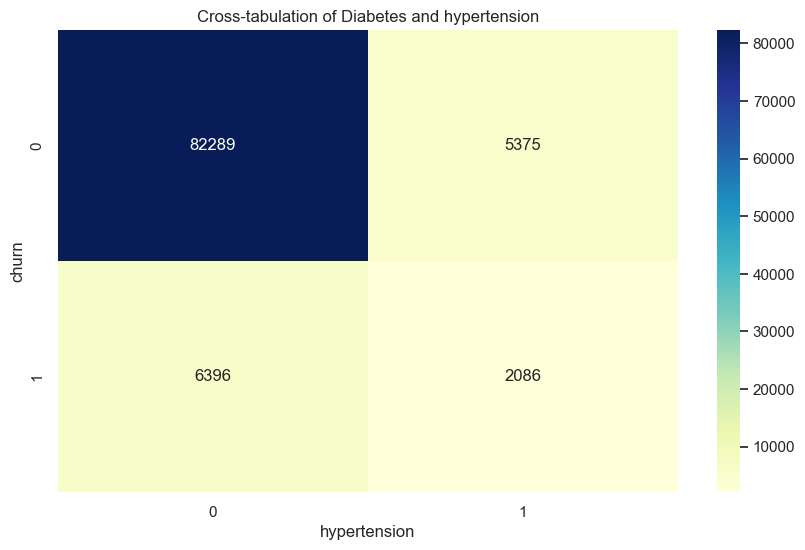

Chi-Square Test for diabetes and heart_disease:
Chi2: 2798.8652727125022, p-value: 0.0



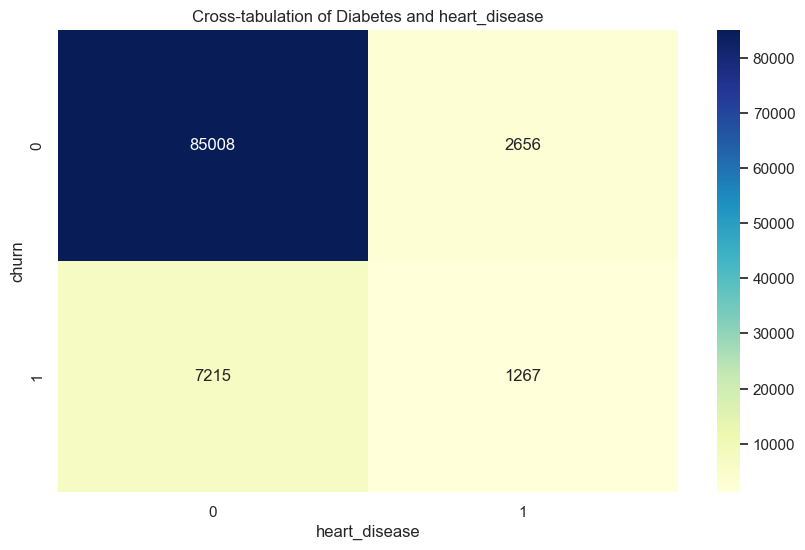

Chi-Square Test for diabetes and diabetes:
Chi2: 96133.56834780476, p-value: 0.0



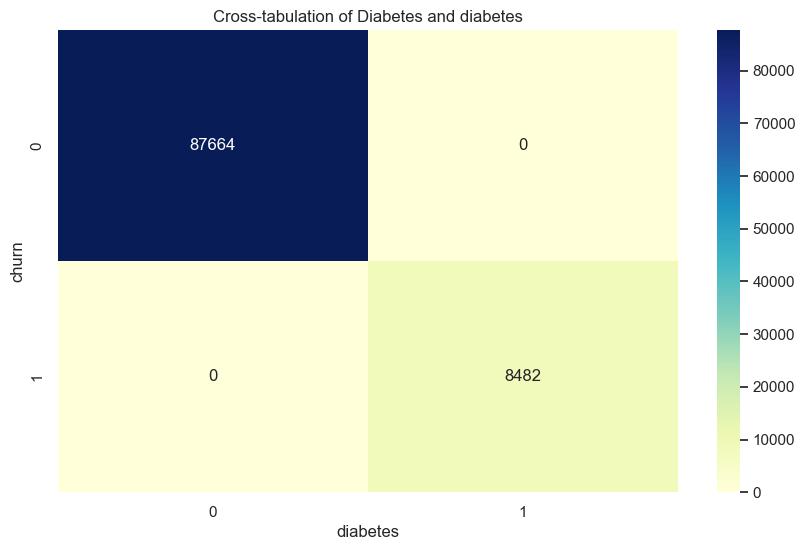

In [ ]:
from scipy.stats import chi2_contingency
# Convert categorical variables to categorical type

df1 = df
df1[categorical_cols] = df1[categorical_cols].astype('category')

# Cross-tabulation and Chi-Square Test
for col in categorical_cols:
    crosstab = pd.crosstab(df1['diabetes'], df[col])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'Chi-Square Test for diabetes and {col}:')
    print(f'Chi2: {chi2}, p-value: {p}\n')

    # Plotting the crosstab result
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Cross-tabulation of Diabetes and {col}')
    plt.xlabel(col)
    plt.ylabel('churn')
    plt.show()

####  Results:

- **gender**  
  Chi2: 139.39, **p-value: 5.4e-31** → Significant  
- **smoking_history**  
  Chi2: 1728.32, **p-value: 0.00** → Highly Significant  
- **hypertension**  
  Chi2: 3680.03, **p-value: 0.00** → Highly Significant  
- **heart_disease**  
  Chi2: 2798.87, **p-value: 0.00** → Highly Significant  

>  **Insight**: All categorical features show statistically significant relationships with the diabetes outcome. None were dropped.

Heatmaps of the cross-tabulated data were also generated to visualize these associations.

---

###  Correlation Analysis for Numerical Features

A correlation matrix was generated for continuous features to assess multicollinearity:

- `age`
- `bmi`
- `HbA1c_level`
- `blood_glucose_level`

Text(0.5, 1.0, 'correlation plot')

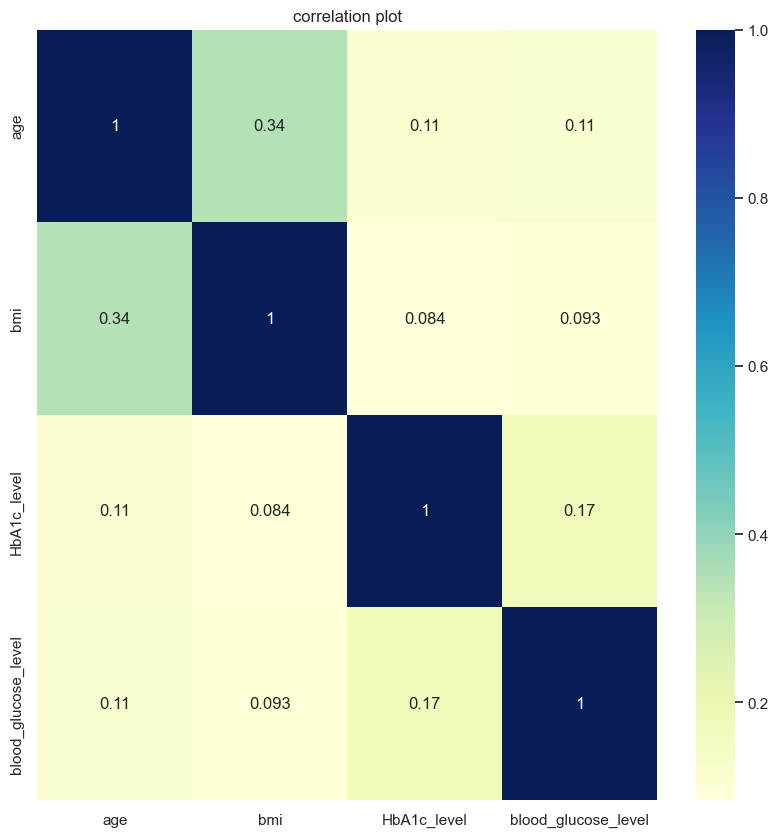

In [32]:
#correlation plot to check if numerical columns are correlated which each other
plt.figure(figsize =(10,10))
cors = df[continous_numerical_cols].corr()
sns.heatmap(cors,annot=True,cmap='YlGnBu')
plt.title('correlation plot')

####  Observation:

- Very **low correlation** was found between these features.
- No pair of numerical features was highly correlated (r > 0.75).

>  **Insight**: No multicollinearity was detected. All continuous features were retained for modeling.

---

##  4.2 Encoding Categorical Variables

Categorical features such as `gender` and `smoking_history` were converted to numeric using **Label Encoding** to ensure compatibility with machine learning models.

---

In [18]:
 #Seperating the dataset into Features (X) and Target (y)
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [19]:
encoder =  OneHotEncoder(drop='first',dtype=int)
enc_data =pd.DataFrame(encoder.fit_transform(X[['gender','smoking_history']]).toarray())
#enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names_out(['gender','smoking_history'])
X = X.join(enc_data)

X.drop(['gender','smoking_history'],axis=1,inplace=True)

##  4.3 Feature Scaling

To ensure consistency in feature scales, especially for distance-based models like KNN and gradient-based models like Logistic Regression, all continuous features were standardized using **StandardScaler**. The scaled features included:

- `age`
- `bmi`
- `HbA1c_level`
- `blood_glucose_level`

>  **Note**: Scaling was done *after* encoding and before model training to prevent data leakage.

---

In [20]:
col1 = X.columns
#scaling all columns using minmax scaler
scaler =  MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col1)

In [41]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0.0,0.0,0.202031,0.400000,0.354545,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1.0,1.0,0.118231,0.236364,0.340909,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#  Step 5: Model Training and Selection

The dataset was split into **training (70%)** and **testing (30%)** subsets.

###  Models Trained:

1. **Logistic Regression**  
2. **Decision Tree Classifier**  
3. **Random Forest Classifier**  
4. **K-Nearest Neighbors (KNN)**

All models were first trained using default hyperparameters to establish a baseline.

###  Model Selection Rationale:

- Models were chosen for their **interpretability** and **alignment with healthcare standards**.
- Simpler models like Logistic Regression and Decision Tree provide transparency, making them suitable for clinical environments.
- More complex models like Random Forest and KNN were included to evaluate performance improvements.

---
###  Data Splitting:

In [21]:
# spliting the dataset into training and test
#for the features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.30,
                                                    random_state=0)

In [10]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [62]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9594369712938566


In [63]:
model2 = model_to_use('DT')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Decision Tree Classifier Accuracy:", accuracy)

Decision Tree Classifier Accuracy: 0.9470947164054916


In [64]:
model3 = model_to_use('RF')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Random Forest classifier Accuracy:", accuracy)

Random Forest classifier Accuracy: 0.9692137012896963


In [66]:
model4 = model_to_use('KNN')
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("K Nearest Neighbour classifier Accuracy:", accuracy4)

K Nearest Neighbour classifier Accuracy: 0.9610317570378588


#  Step 5.2: Hyperparameter Optimization

After evaluating baseline models using default parameters, hyperparameter tuning was conducted to further optimize model performance using **RandomizedSearchCV**. This method efficiently explores a wide parameter space to find the best model configurations using cross-validation.

---

##  Tuning Approach

For each classifier, the following steps were followed:

1. A set of hyperparameters and their value distributions was defined.
2. `RandomizedSearchCV` was applied with **5-fold cross-validation** and **50 iterations** per model.
3. The best-performing model from each search was retrained and evaluated on the test set.

---

In [30]:
# Define the classifiers and their parameter grids for RandomizedSearchCV
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000,class_weight='balanced'), {
        'C': np.logspace(-3, 3, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5)
    }),
    'Random Forest': (RandomForestClassifier(class_weight='balanced'), {
        'n_estimators': randint(50, 300),
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5)
 
    }),
    'KNN': (KNeighborsClassifier(weights='distance'), {
        'n_neighbors': randint(3, 12),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    })
    
}

# Perform RandomizedSearchCV with cross-validation for each classifier
best_estimators = {}

for name, (clf, param_grid) in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
     n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)
    random_search.fit(X_train, y_train)
    best_estimators[name] = random_search.best_estimator_
    print(f'Best parameters for {name}: {random_search.best_params_}')
    print(f'Best score for {name}: {random_search.best_score_}\n')

# Evaluate the best estimators on the test set
for name, best_estimator in best_estimators.items():
    test_score = best_estimator.score(X_test, y_test)
    print(f'Test score for {name}: {test_score}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/test/Documents/Diabetes_prediction/diabetes_pred/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(2.154434690031882)}
Best score for Logistic Regression: 0.8872098626674848

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.950194592203132

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 233}
Best score for Random Forest: 0.9681584188011969

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Best score for KNN: 0.9591245271547224

Test score for Logistic Regression: 0.8849674109000139
Test score for Decision Tree: 0.9485854943835806
Test score for Random Forest: 0.969456386076827




# 📊 Step 6: Model Evaluation

After training baseline models, we addressed the **class imbalance** using **class weighting**, which adjusts the learning process to penalize the minority class (diabetes = 1) more heavily. This helps to reduce false negatives — a critical consideration in medical diagnosis.

Each model was evaluated based on:

- **Accuracy**
- **ROC-AUC Score**
- **Recall for Diabetes Class (1)**
- **False Negatives**
- **Commentary**

---


In [11]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['No','Yes'])

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

## Logistic Regression


 Accuracy Score : 
  0.8846553876022744

 AUC Score : 
 0.961089869567529

 Confusion Matrix : 
  [[23346  3041]
 [  286  2171]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     26387
           1       0.42      0.88      0.57      2457

    accuracy                           0.88     28844
   macro avg       0.70      0.88      0.75     28844
weighted avg       0.94      0.88      0.90     28844


 ROC curve : 



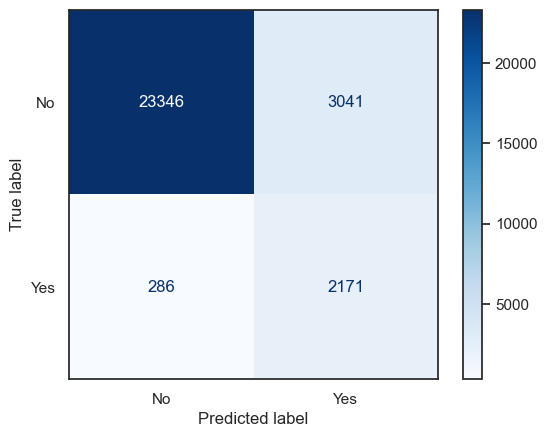

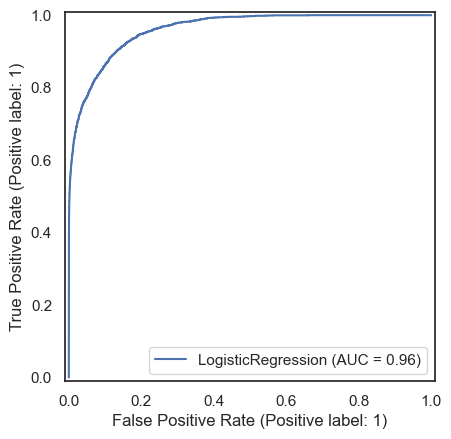

In [ ]:


# Initialize the Logistic Regression model with class weighting
logistic_model = LogisticRegression(
    random_state=40,
    class_weight='balanced',  # Automatically adjusts weights inversely proportional to class frequencies
    solver='saga',
    penalty='l2',  # L2 regularization (Ridge)
    C= 2.154434690031882  # Regularization parameter
)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Evaluate the model's performance
performance(logistic_model, X_train, y_train, X_test, y_test)


## Decision Tree Classifier


 Accuracy Score : 
  0.9507003189571488

 AUC Score : 
 0.8526124923782862

 Confusion Matrix : 
  [[25620   767]
 [  655  1802]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     26387
           1       0.70      0.73      0.72      2457

    accuracy                           0.95     28844
   macro avg       0.84      0.85      0.85     28844
weighted avg       0.95      0.95      0.95     28844


 ROC curve : 



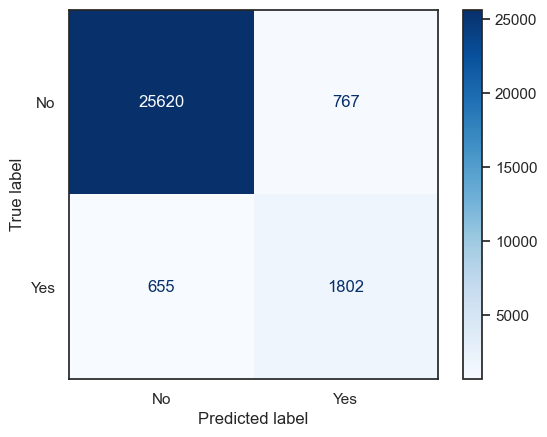

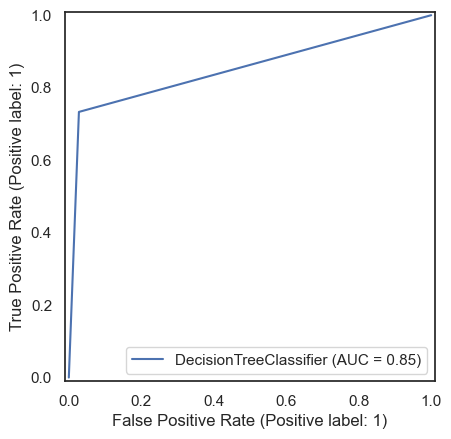

In [ ]:


# Initialize the Decision Tree model with class weighting
decision_tree_model = DecisionTreeClassifier(
    random_state=40,
    criterion='gini',
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced'  # Automatically adjusts weights inversely proportional to class frequencies
)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model's performance
performance(decision_tree_model, X_train, y_train, X_test, y_test)


## Random Forest classifier


 Accuracy Score : 
  0.938635418111219

 AUC Score : 
 0.9755593687454074

 Confusion Matrix : 
  [[25005  1382]
 [  388  2069]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     26387
           1       0.60      0.84      0.70      2457

    accuracy                           0.94     28844
   macro avg       0.79      0.89      0.83     28844
weighted avg       0.95      0.94      0.94     28844


 ROC curve : 



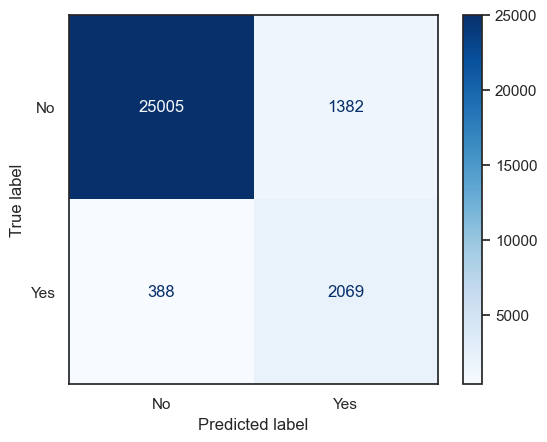

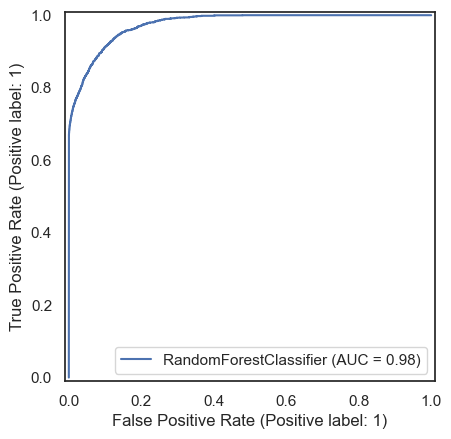

In [33]:

# Initialize the RandomForestClassifier with class weighting
RF_model = RandomForestClassifier(
    random_state=40,
    criterion='gini',
    max_depth=20,
    min_samples_leaf=6,
    min_samples_split=2,
    n_estimators=122,
    class_weight='balanced'  # Automatically adjusts weights inversely proportional to class frequencies
)

# Fit the model on the training data
RF_model.fit(X_train, y_train)

# Evaluate the model's performance
performance(RF_model, X_train, y_train, X_test, y_test)


## K Nearest Neighbour classifier


 Accuracy Score : 
  0.9609624185272501

 AUC Score : 
 0.9316679987843819

 Confusion Matrix : 
  [[26224   163]
 [  963  1494]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     26387
           1       0.90      0.61      0.73      2457

    accuracy                           0.96     28844
   macro avg       0.93      0.80      0.85     28844
weighted avg       0.96      0.96      0.96     28844


 ROC curve : 



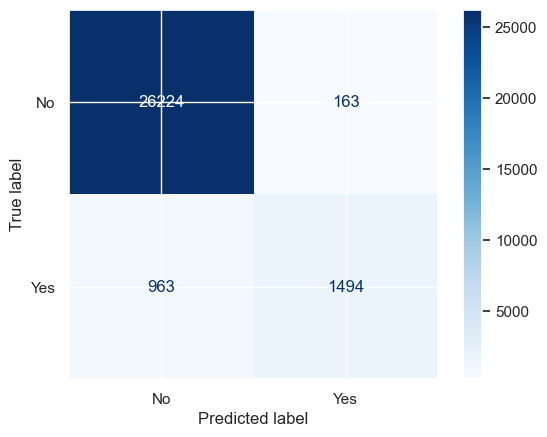

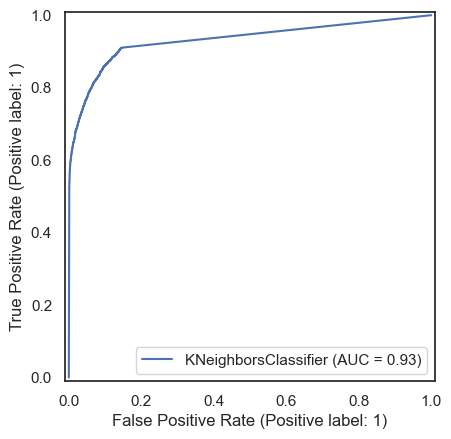

In [31]:


# Initialize the KNN model with distance-based weighting
knn_model = KNeighborsClassifier(
    metric='minkowski',  # Use Minkowski distance   
    weights='distance' , # Weigh neighbors by their distance
    n_neighbors=9,  # Number of neighbors to consider
)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Evaluate the model's performance
performance(knn_model, X_train, y_train, X_test, y_test)




##  Final Model Comparison (After Class Weighting)

| Model                 | Accuracy | ROC-AUC | Recall (Diabetes) | False Negatives | Comments |
|----------------------|----------|---------|-------------------|------------------|----------|
| **Logistic Regression** | 88.47%   | 0.9611  | **88%**           | 286              | Major recall improvement. Slight drop in accuracy shows prioritization of diabetic detection. |
| **Decision Tree**        | 95.07%   | 0.8526  | **73%**           | 655              | Balances recall with model simplicity and interpretability. |
| **Random Forest** 🏆      | 93.86%   | 0.9756  | **84%**           | 388              | Top performer. Excellent recall, AUC, and general robustness. |
| **K-Nearest Neighbors**  | 96.10%   | 0.9317  | **61%**           | 963              | Despite good accuracy, recall remains low. Higher false negatives make it less ideal in healthcare. |

---

##  Metric Focus: Why Recall Matters

In healthcare, the **cost of missing a true diabetic (false negative)** is high, potentially leading to serious health outcomes.  
Thus, we prioritize **Recall on the diabetic class (1)** over general accuracy or even AUC.

---



### Model Dumping Of Best Model

In [34]:

import pickle


# Dump the model, encoder, and scaler to files
with open('diabetes_model.pkl', 'wb') as model_file:
    pickle.dump(RF_model, model_file)


print("Model have been dumped successfully!")

Model have been dumped successfully!


### Feature Importance

Feature ranking:
1. HbA1c_level (0.3712)
2. blood_glucose_level (0.2980)
3. age (0.1657)
4. bmi (0.0978)
5. hypertension (0.0282)
6. heart_disease (0.0176)
7. smoking_history_former (0.0060)
8. gender_Male (0.0058)
9. smoking_history_never (0.0035)
10. smoking_history_current (0.0023)
11. smoking_history_not current (0.0021)
12. smoking_history_ever (0.0016)
13. gender_Other (0.0000)


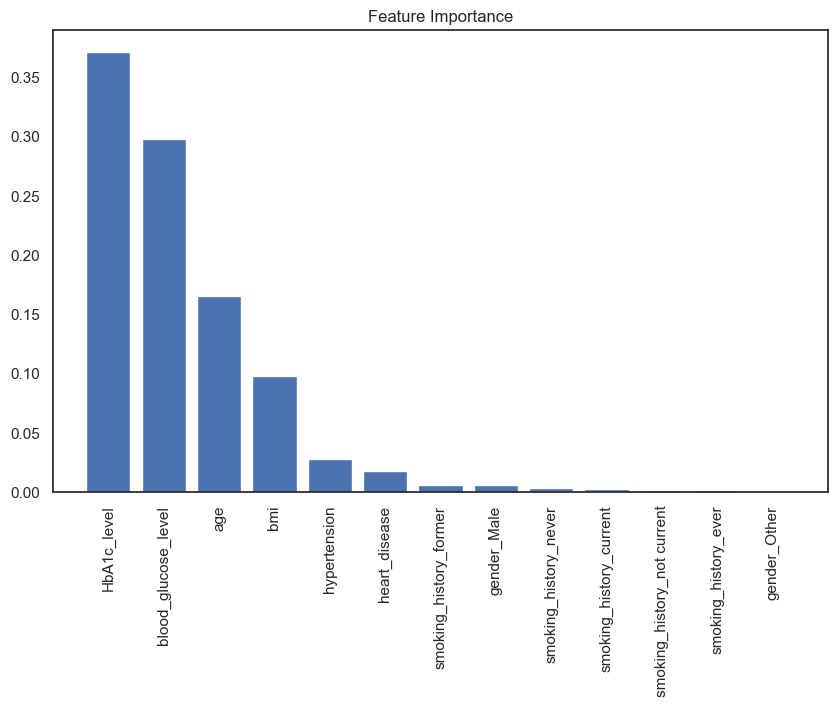

In [35]:
# Feature importance
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print feature importance
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

##  Final Recommendation

### 🔍 Best Model: **Random Forest Classifier (with Class Weighting)**
- **Recall:** 84%
- **Accuracy:** 93.86%
- **AUC:** 0.9756  
- Robust, interpretable, and effective in identifying at-risk patients.

---

##  Business Value

- Improves **early diabetes detection** at Stark Health Clinic.
- Enables **targeted interventions** and resource allocation.
- Reduces long-term healthcare costs through **proactive care**.

---

##  Next Steps

- Deploy the model within clinical systems as a **decision-support tool**.
- **Retrain** periodically with new data to maintain performance.
- Integrate **explainability tools** (e.g., SHAP, LIME) to enhance transparency.